<a href="https://colab.research.google.com/github/Gleycykelly/lia1-2023-1/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradio Pets

<hr style="height:10px">

<div class='container2'>
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2023/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px">

    
<h2>Aula 6 - FastAI - Deployment</h2>

Notebook desenvolvido por: Gleycykelly Syssy Indymayer Carnot Amaro

 <hr style="height:2px">


 Link do Hugging Face: https://huggingface.co/spaces/Gleycykelly/CastVsDog


In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

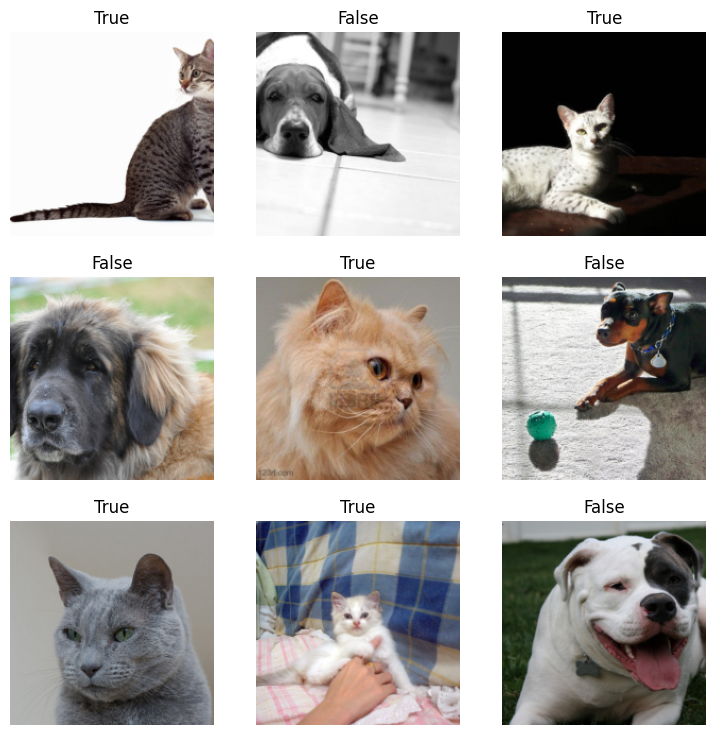

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.190315,0.063457,0.018945,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.081089,0.063581,0.023681,00:56
1,0.050591,0.039402,0.012855,00:54
2,0.021501,0.029089,0.010149,00:53


In [6]:
learn.export('model.pkl')

In [7]:
!pip install -q gradio
import gradio as gr
im = PILImage.create('dog.jpg')

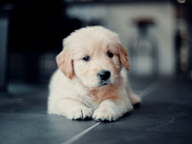

In [8]:
im.thumbnail((192, 192))
im

In [9]:
learn = load_learner('model.pkl')

In [10]:
learn.predict(im)

('False', tensor(0), tensor([1.0000e+00, 1.0778e-06]))

In [11]:
categories = ('Dog', 'Cat')

def classify_image(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [12]:
classify_image(im)

{'Dog': 0.999998927116394, 'Cat': 1.0777860097732628e-06}

In [15]:
image = gr.Image(shape=(192, 192))
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


In [16]:
!pip install -q nbdev
import nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.5 MB/s eta 0:00:00


In [17]:
nbdev.export.nb_export('/content/catvsdog.ipynb', 'CatVSDog')

Sucesso
